# ML Project - Tech Stock Market Analysis and Prediction


We will look at a few tech stock from the data source and its history. By applying some basic analysis and then use these insight to track patterns. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method! This will help us determine the risk of the stock
   

## 1. What was the change in price of the stock overtime?

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [69]:
# FAANG STOCK, FB, AMZN, AAPL, NFLX, GOOG
# Other Major Tech Stock CRM, MSFT

AAPL = pd.read_csv("stock_data/tech/AAPL.csv")
# AMZN = pd.read_csv("stock_data/tech/AMZN.csv")
# FB = pd.read_csv("stock_data/tech/FB.csv")
# GOOG = pd.read_csv("stock_data/tech/GOOG.csv")
# NFLX = pd.read_csv("stock_data/tech/NFLX.csv")
CRM = pd.read_csv("stock_data/tech/CRM.csv")
MSFT = pd.read_csv("stock_data/tech/MSFT.csv")

In [3]:
AAPL

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.284267
1,2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.290990
2,2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.272961
3,2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.331634
4,2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.323994
...,...,...,...,...,...,...,...
3744,2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,120.300003
3745,2020-11-17,120.669998,118.959999,119.550003,119.389999,74271000.0,119.389999
3746,2020-11-18,119.820000,118.000000,118.610001,118.029999,76322100.0,118.029999
3747,2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,118.639999


Text(0.5, 0, 'Date')

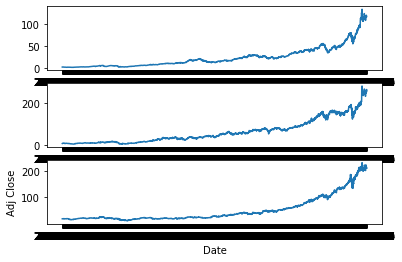

In [4]:
# Let's see a historical view of the closing price

fig, (pl1, pl2, pl3) = plt.subplots(3)
pl1.plot(AAPL['Date'], AAPL['Adj Close'])
pl2.plot(CRM['Date'], CRM['Adj Close'])
pl3.plot(MSFT['Date'], MSFT['Adj Close'])
plt.ylabel('Adj Close')
plt.xlabel('Date')


Text(0.5, 0, 'Date')

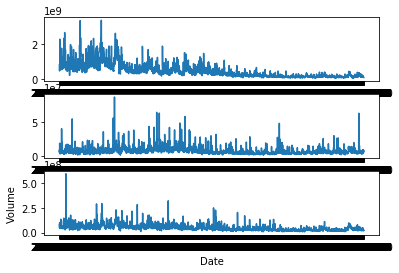

In [5]:
# Now let's plot the total volume of stock being traded each day

fig2, (plv1, plv2, plv3) = plt.subplots(3)
plv1.plot(AAPL['Date'], AAPL['Volume'])
plv2.plot(CRM['Date'], CRM['Volume'])
plv3.plot(MSFT['Date'], MSFT['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')


All three tech stock seems to have a pattern and the closing price trend seems to mirror one another. The volumn trade slighly differs.

## 2. What was the moving average of the various stocks?

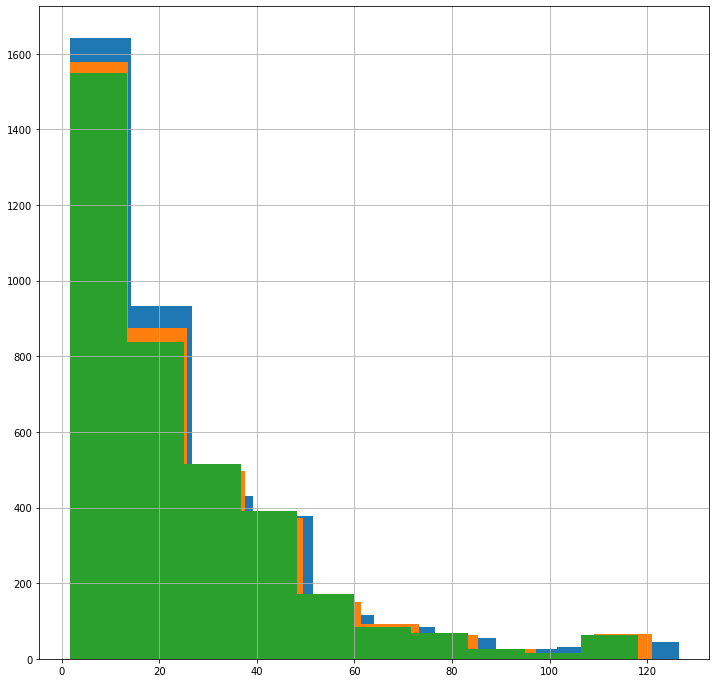

In [12]:
AAPL['Adj Close'].rolling(10).mean().hist(figsize=(12, 12));
AAPL['Adj Close'].rolling(20).mean().hist(figsize=(12, 12));
AAPL['Adj Close'].rolling(30).mean().hist(figsize=(12, 12));

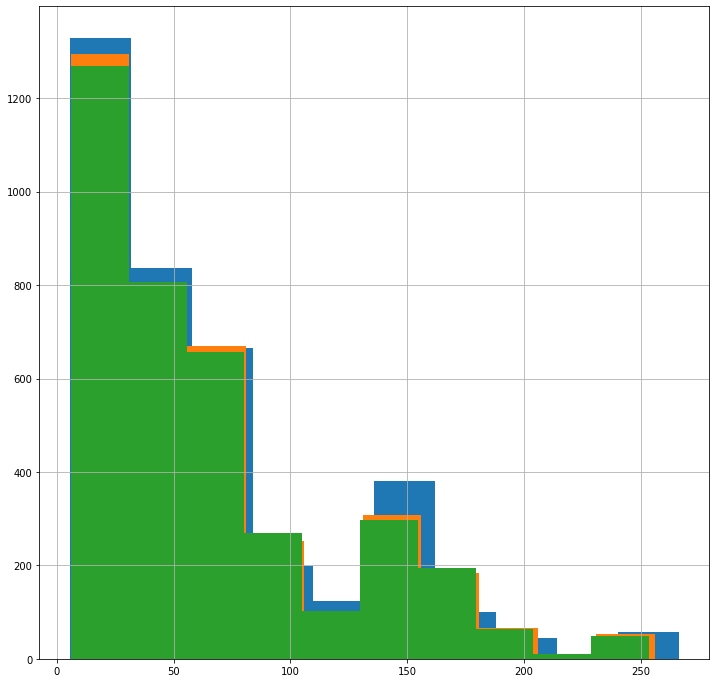

In [13]:
CRM['Adj Close'].rolling(10).mean().hist(figsize=(12, 12));
CRM['Adj Close'].rolling(20).mean().hist(figsize=(12, 12));
CRM['Adj Close'].rolling(30).mean().hist(figsize=(12, 12));

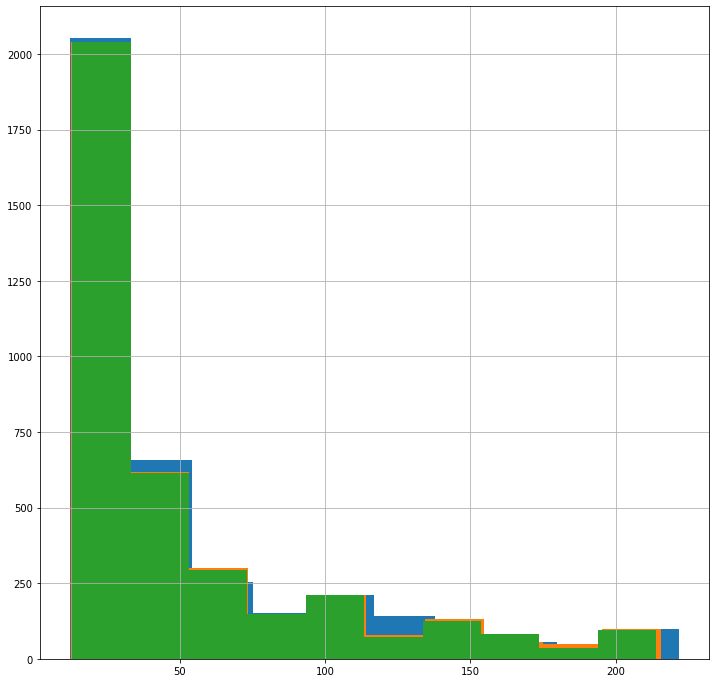

In [14]:
MSFT['Adj Close'].rolling(10).mean().hist(figsize=(12, 12));
MSFT['Adj Close'].rolling(20).mean().hist(figsize=(12, 12));
MSFT['Adj Close'].rolling(30).mean().hist(figsize=(12, 12));

## 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

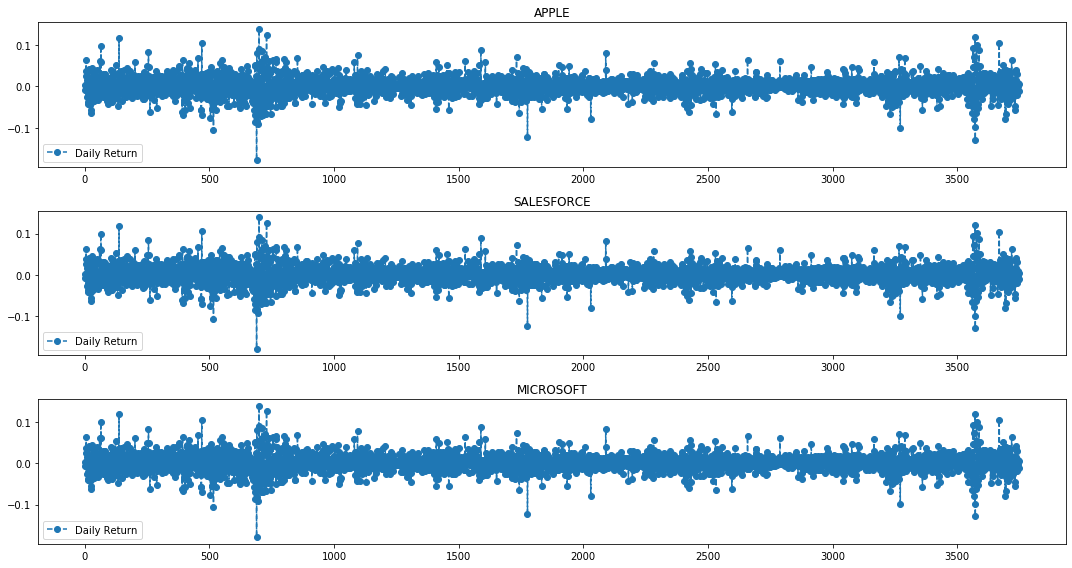

In [74]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
CRM['Daily Return'] = AAPL['Adj Close'].pct_change()
MSFT['Daily Return'] = AAPL['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('APPLE')

CRM['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('SALESFORCE')

MSFT['Daily Return'].plot(ax=axes[2], legend=True, linestyle='--', marker='o')
axes[2].set_title('MICROSOFT')

# AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
# axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [52]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pd.concat([AAPL['Adj Close'], CRM['Adj Close'], MSFT['Adj Close']], axis=1, keys=['AAPL', 'CRM', 'MSFT'])
closing_df

,AAPL,CRM,MSFT
0,2.284267,8.560000,19.504198
1,2.290990,8.992500,19.598677
2,2.272961,9.015000,19.613205
3,2.331634,9.962500,19.555077
4,2.323994,9.632500,19.518734
...,...,...,...
3744,120.300003,249.889999,216.662766
3745,119.389999,256.170013,213.900009
3746,118.029999,257.160004,211.080002
3747,118.639999,264.649994,212.419998


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [53]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,CRM,MSFT
0,NaN,NaN,NaN
1,0.002943,0.050526,0.004844
2,-0.007869,0.002502,0.000741
3,0.025813,0.105103,-0.002964
4,-0.003277,-0.033124,-0.001858


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

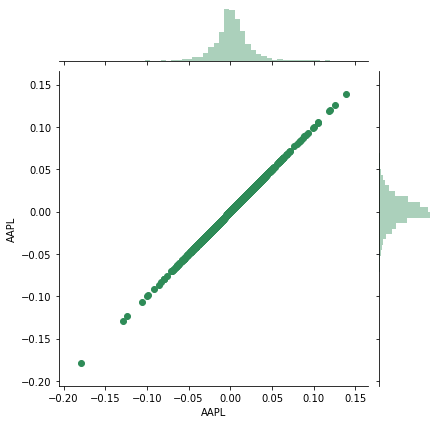

In [54]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('AAPL', 'AAPL', tech_rets, kind='scatter', color='seagreen')

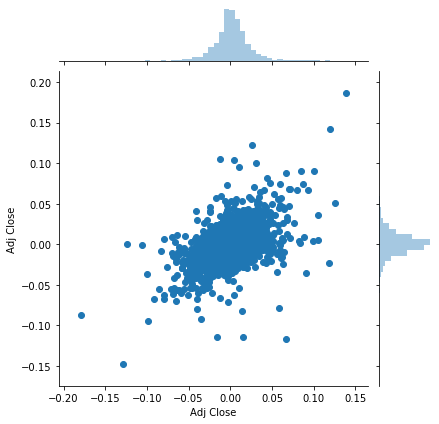

In [35]:
# We'll use joinplot to compare the daily returns of AAPL and Microsoft
sns.jointplot('AAPL', 'MSFT', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

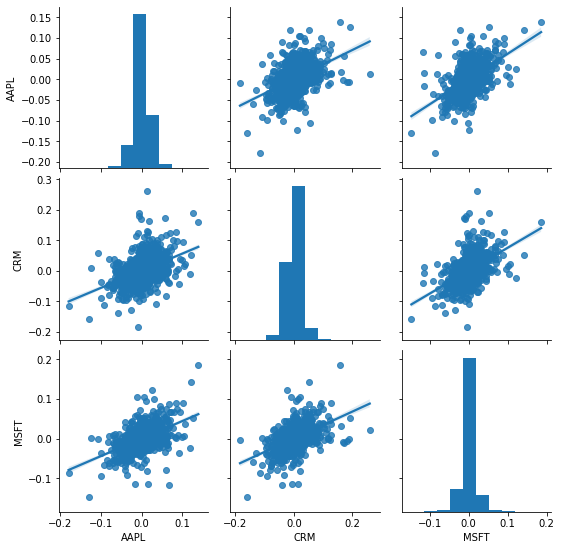

In [55]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

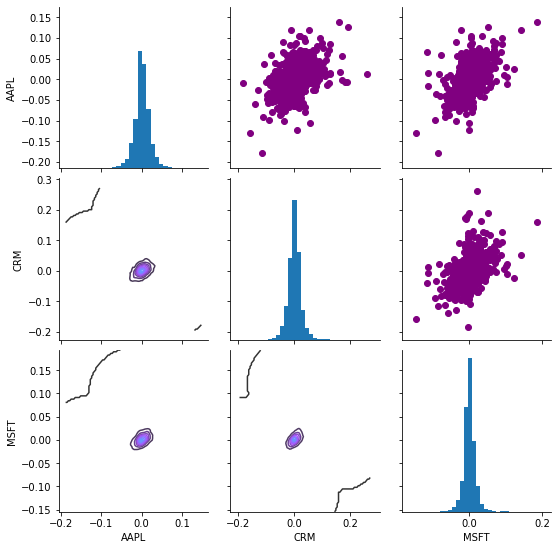

In [56]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship.

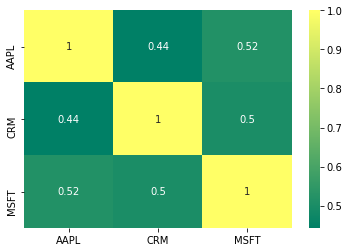

In [57]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

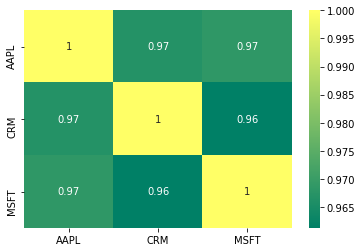

In [58]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

## 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

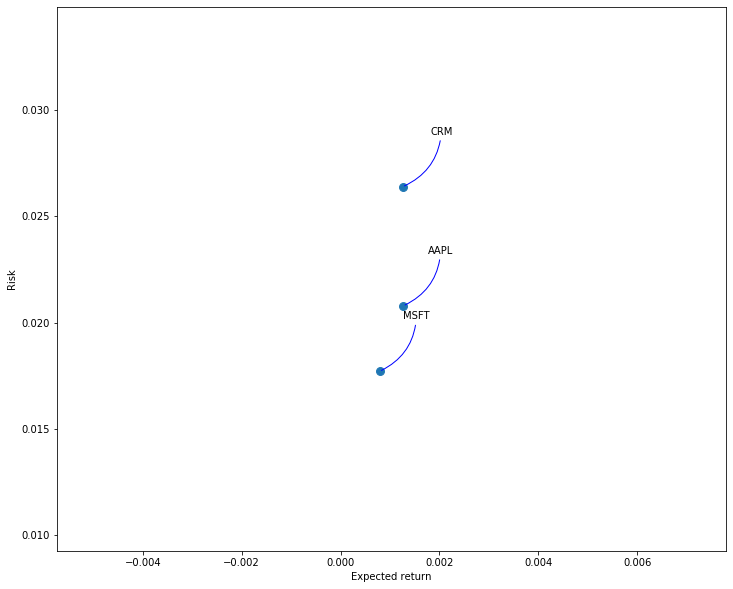

In [59]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of Tech Stock:

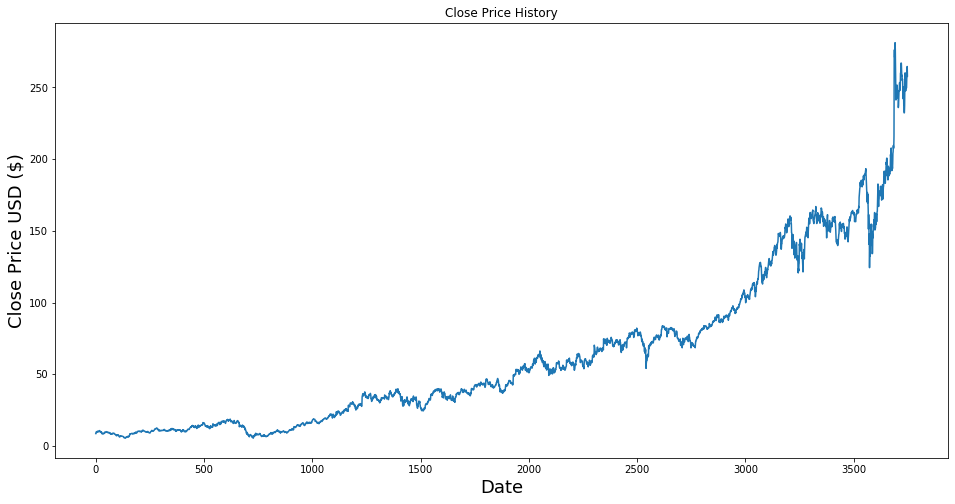

In [75]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(CRM['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [76]:
#Create a new dataframe with only the 'Close column
data = CRM.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

3000

In [77]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01123147],
       [0.01279971],
       [0.0128813 ],
       ...,
       [0.91265015],
       [0.93980871],
       [0.91584103]])

In [78]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01123147, 0.01279971, 0.0128813 , 0.01631691, 0.01512034,
       0.01486652, 0.01488465, 0.01486652, 0.01475774, 0.01553733,
       0.01789421, 0.01763133, 0.01638943, 0.01636224, 0.01642569,
       0.01601777, 0.01661605, 0.01790328, 0.0188551 , 0.0174047 ,
       0.01654353, 0.01598151, 0.01484839, 0.01570956, 0.01477587,
       0.01502062, 0.01588179, 0.01201106, 0.0112496 , 0.01160314,
       0.01110456, 0.01175724, 0.01132212, 0.01066038, 0.01137651,
       0.01102298, 0.01082355, 0.01107737, 0.01178443, 0.01356117,
       0.01347958, 0.01467616, 0.01316231, 0.01398722, 0.01447673,
       0.01419571, 0.01448579, 0.01544667, 0.01625345, 0.01551013,
       0.015492  , 0.01568237, 0.01526537, 0.01425917, 0.01375153,
       0.01418665, 0.01428636, 0.01490278, 0.01364275, 0.01344332])]
[0.013570230085238753]

[array([0.01123147, 0.01279971, 0.0128813 , 0.01631691, 0.01512034,
       0.01486652, 0.01488465, 0.01486652, 0.01475774, 0.01553733,
       0.01789421, 0.01763133, 0.0

In [80]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=10, epochs=5)

Epoch 1/5
2940/2940 [==============================] - 28s 10ms/step - loss: 2.9145e-04
Epoch 2/5
2940/2940 [==============================] - 30s 10ms/step - loss: 5.2161e-05
Epoch 3/5
2940/2940 [==============================] - 28s 10ms/step - loss: 5.4577e-05
Epoch 4/5
2940/2940 [==============================] - 27s 9ms/step - loss: 5.2339e-05
Epoch 5/5
2940/2940 [==============================] - 26s 9ms/step - loss: 3.5992e-05


In [81]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.904925980311818

/Users/jig728/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


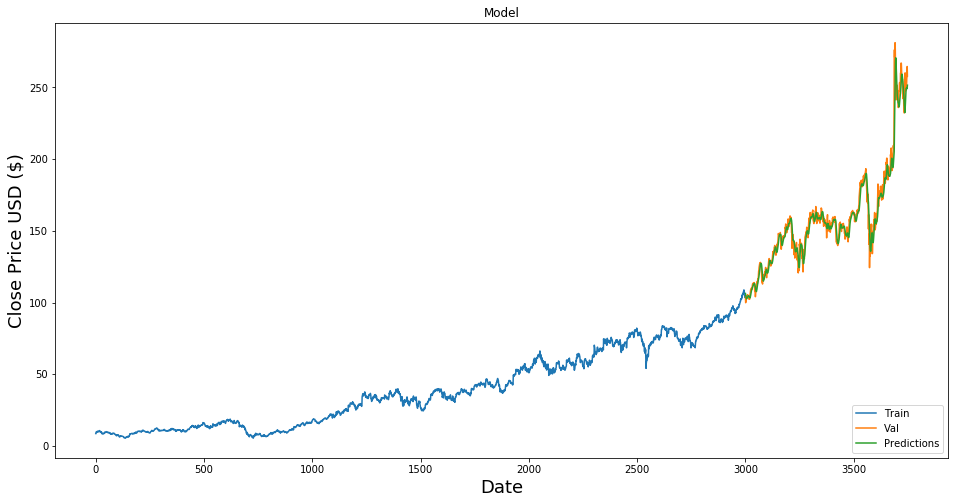

In [82]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [83]:
#Show the valid and predicted prices
valid

,Close,Predictions
3000,103.830002,106.234474
3001,99.849998,105.603096
3002,100.690002,104.537247
3003,102.919998,103.477379
3004,104.070000,102.823532
...,...,...
3744,249.889999,249.451370
3745,256.170013,248.996063
3746,257.160004,249.229095
3747,264.649994,249.860077
